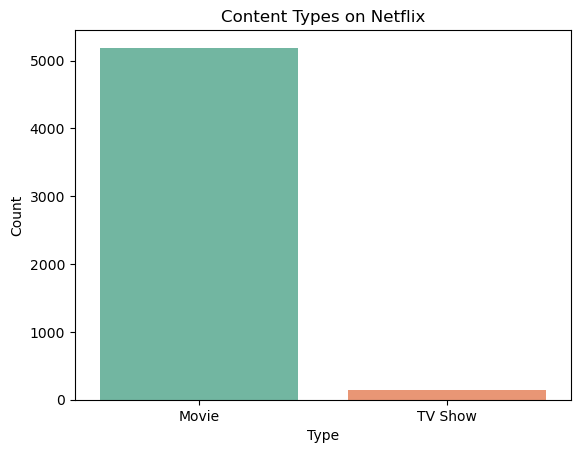

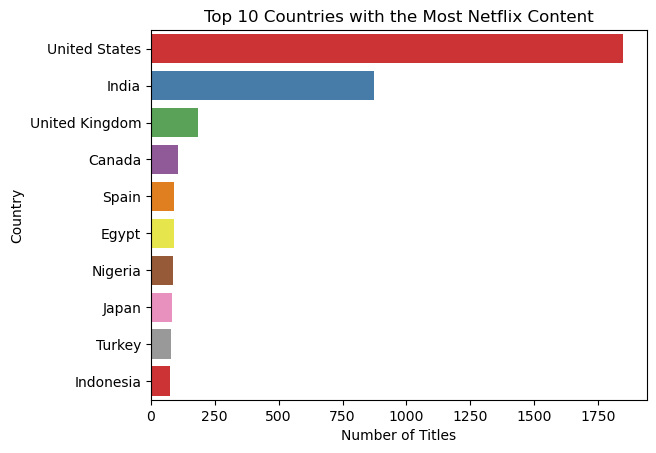

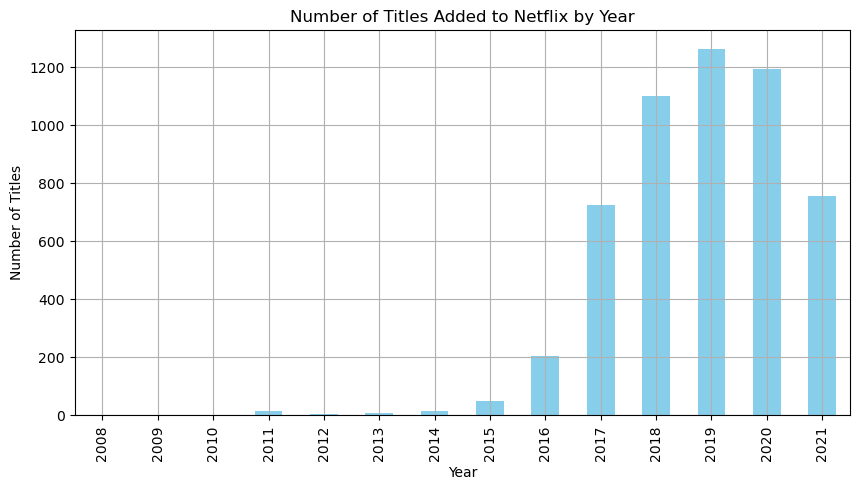

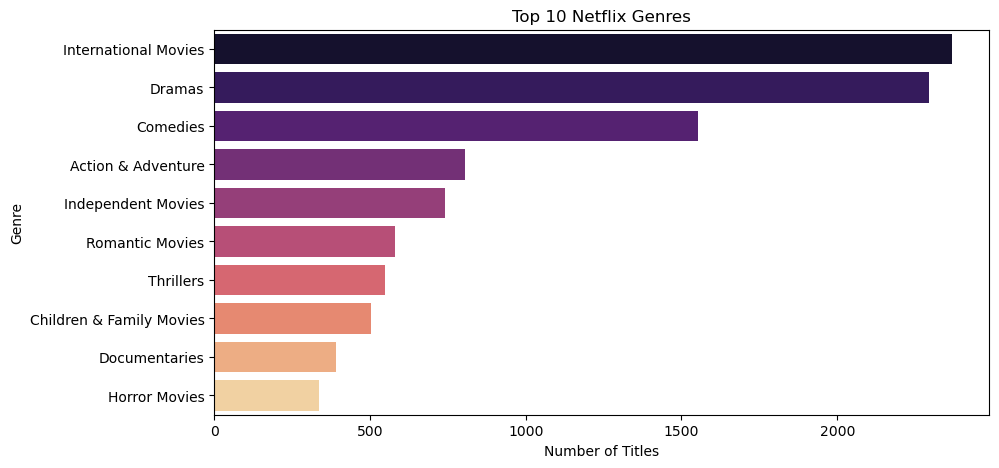

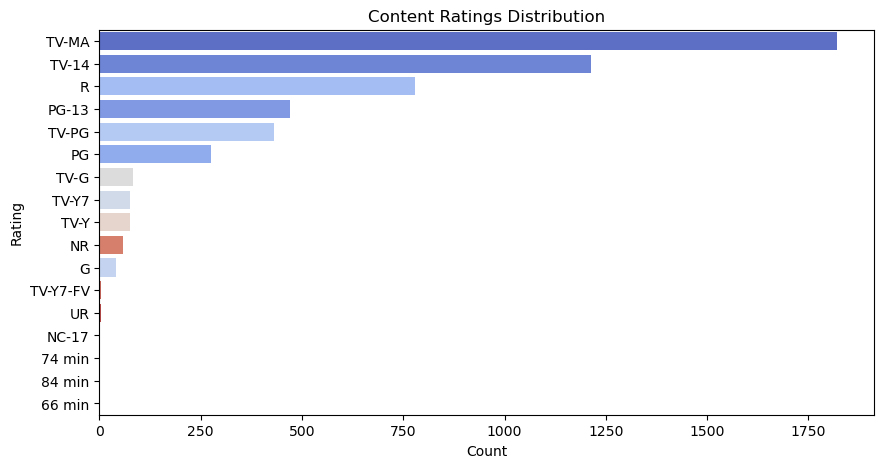

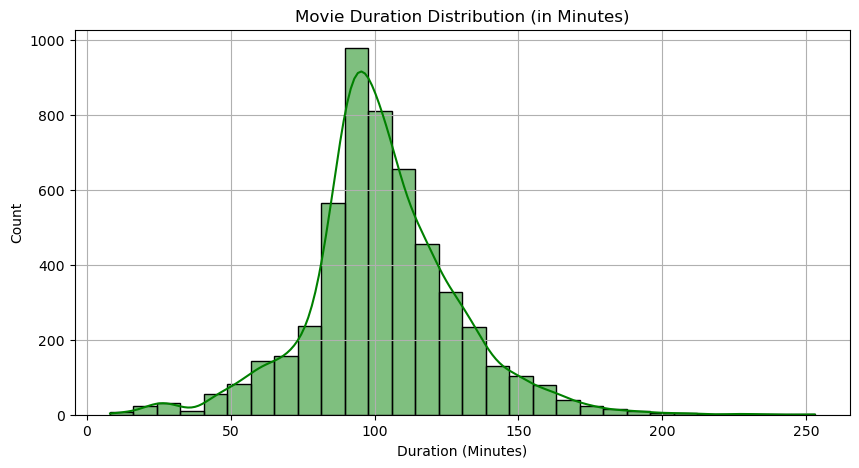

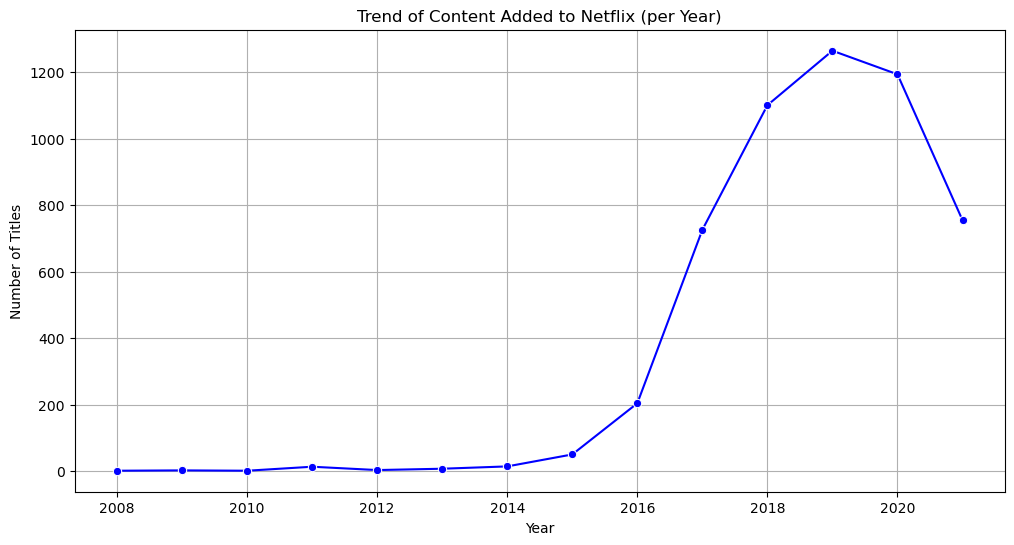

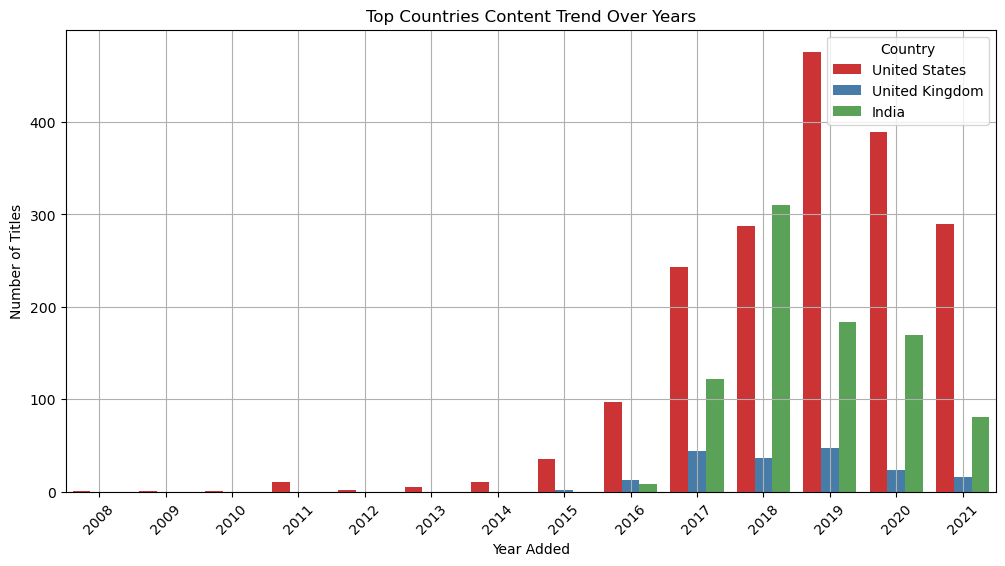

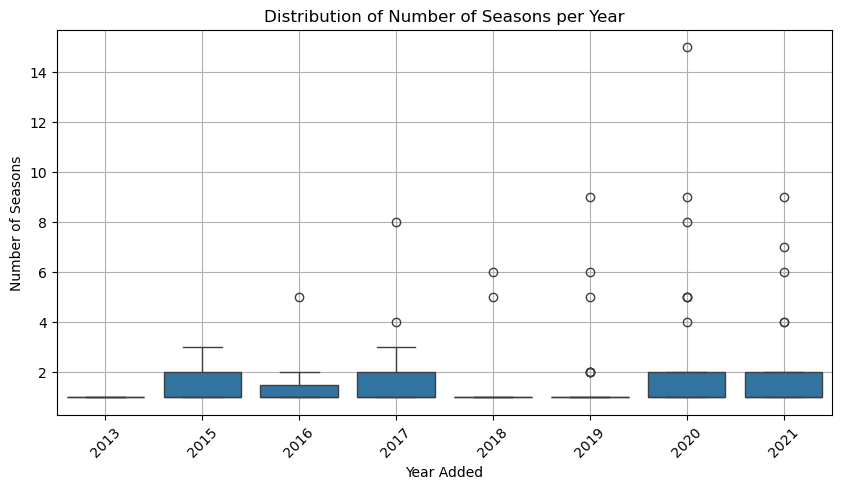

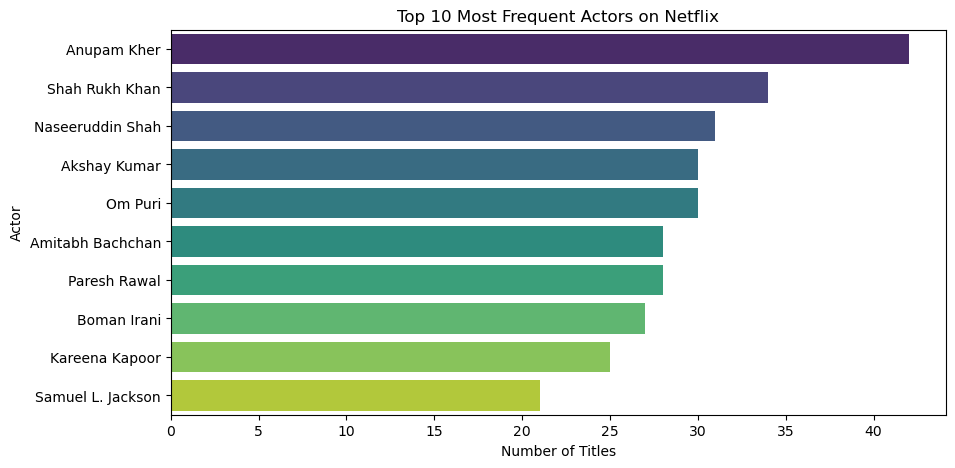

In [34]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load Dataset
df = pd.read_csv("netflix_titles.csv")

# Step 3: Preview Data
df.head()

# Check missing values
df.isnull().sum()

# Drop rows with too many missing values
df = df.dropna(subset=["date_added", "country", "cast", "director"], how='any')

# Convert 'date_added' to datetime - strip whitespace before conversion
df["date_added"] = df["date_added"].str.strip()  # Remove leading/trailing spaces
df["date_added"] = pd.to_datetime(df["date_added"])

# Extract year added
df["year_added"] = df["date_added"].dt.year

# Filter movies and shows
movies = df[df["type"] == "Movie"]
shows = df[df["type"] == "TV Show"]

# Count of Movies vs TV Shows
sns.countplot(data=df, x='type', hue='type', palette='Set2', legend=False)
plt.title("Content Types on Netflix")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

# Top 10 Countries Producing Netflix Content
top_countries = df['country'].value_counts().head(10)

sns.barplot(x=top_countries.values, y=top_countries.index, hue=top_countries.index, palette='Set1', legend=False)
plt.title("Top 10 Countries with the Most Netflix Content")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()

# Netflix Content Over the Years
df['year_added'].value_counts().sort_index().plot(kind='bar', figsize=(10,5), color='skyblue')
plt.title("Number of Titles Added to Netflix by Year")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.grid(True)
plt.show()

# Top Genres on Netflix
# Some entries have multiple genres separated by commas, so we need to split them
from collections import Counter

all_genres = df['listed_in'].dropna().str.split(', ')
genre_counts = Counter([genre for sublist in all_genres for genre in sublist])
top_genres = dict(sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)[:10])

plt.figure(figsize=(10,5))
sns.barplot(x=list(top_genres.values()), y=list(top_genres.keys()), hue=list(top_genres.keys()), palette='magma', legend=False)
plt.title("Top 10 Netflix Genres")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.show()

# Most Frequent Ratings (TV-MA, PG, etc.)
plt.figure(figsize=(10,5))
sns.countplot(data=df, y='rating', hue='rating',
             order=df['rating'].value_counts().index, 
             palette='coolwarm', legend=False)
plt.title("Content Ratings Distribution")
plt.xlabel("Count")
plt.ylabel("Rating")
plt.show()

# Content Duration (Only for Movies)
# Clean up 'duration' column
movies = df[df['type'] == 'Movie'].copy()
movies['duration_int'] = movies['duration'].str.extract(r'(\d+)').astype(float)  # Using raw string for regex

plt.figure(figsize=(10,5))
sns.histplot(movies['duration_int'].dropna(), bins=30, kde=True, color='green')
plt.title("Movie Duration Distribution (in Minutes)")
plt.xlabel("Duration (Minutes)")
plt.ylabel("Count")
plt.grid(True)
plt.show()

# What is the trend of content added per year?
yearly_counts = df['year_added'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values, marker='o', color='blue')
plt.title("Trend of Content Added to Netflix (per Year)")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.grid(True)
plt.show()

# Which country produces the most content over the years?
top_countries = df['country'].value_counts().head(3).index.tolist()
country_trend = df[df['country'].isin(top_countries)]

plt.figure(figsize=(12, 6))
sns.countplot(data=country_trend, x='year_added', hue='country', palette='Set1')
plt.title("Top Countries Content Trend Over Years")
plt.xlabel("Year Added")
plt.ylabel("Number of Titles")
plt.legend(title='Country')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Are TV Shows getting longer or shorter (Number of seasons)?
tv_shows = df[df['type'] == 'TV Show'].copy()
tv_shows['seasons'] = tv_shows['duration'].str.extract(r'(\d+)').astype(float)  # Using raw string for regex

plt.figure(figsize=(10, 5))
sns.boxplot(x='year_added', y='seasons', data=tv_shows)
plt.title("Distribution of Number of Seasons per Year")
plt.xlabel("Year Added")
plt.ylabel("Number of Seasons")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Most Frequent Actors on Netflix
from collections import Counter

actor_series = df['cast'].dropna().str.split(', ')
actor_counts = Counter([actor for sublist in actor_series for actor in sublist])
top_actors = dict(actor_counts.most_common(10))

plt.figure(figsize=(10,5))
# Fix the last barplot to use hue parameter
sns.barplot(x=list(top_actors.values()), y=list(top_actors.keys()), 
           hue=list(top_actors.keys()), palette='viridis', legend=False)
plt.title("Top 10 Most Frequent Actors on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Actor")
plt.show()

df_ml = df.copy()

# Drop unnecessary columns
df_ml = df_ml.drop(['show_id', 'description', 'title'], axis=1)

# Convert 'date_added' to datetime
df_ml['date_added'] = pd.to_datetime(df_ml['date_added'])
df_ml['year_added'] = df_ml['date_added'].dt.year
df_ml['month_added'] = df_ml['date_added'].dt.month

# Fill missing values
df_ml['country'] = df_ml['country'].fillna('Unknown')
df_ml['rating'] = df_ml['rating'].fillna('Not Rated')

# Encode 'type', 'rating'
df_ml['type'] = df_ml['type'].map({'Movie': 0, 'TV Show': 1})

from sklearn.preprocessing import LabelEncoder

le_rating = LabelEncoder()
df_ml['rating_encoded'] = le_rating.fit_transform(df_ml['rating'])

# Select features
features = df_ml[['type', 'year_added', 'month_added', 'rating_encoded']]
features.head()

# Save the cleaned data to a new CSV file
df.to_csv("cleaned_netflix_data.csv", index=False)